<a href="https://colab.research.google.com/github/SahithiK792/ML/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded= files.upload()

for filename in uploaded.keys():
  print(filename)

Saving iotsim-air-quality-1 (1).csv to iotsim-air-quality-1 (1).csv
iotsim-air-quality-1 (1).csv


Question 1 2

In [ ]:
# A1: Single-attribute Linear Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math

def safe_mape(y_true, y_pred, eps=1e-8):
    # Avoid division by zero: for tiny y_true use eps
    return np.mean(np.abs((y_true - y_pred) / np.where(np.abs(y_true) < eps, eps, y_true))) * 100


df = pd.read_csv('iotsim-air-quality-1 (1).csv')
feature = 'tcp.window_size_value'
target = 'frame.len'

# Drop rows with NaNs in the used columns (or you can impute)
df = df[[feature, target]].dropna()

X = df[['tcp.window_size_value']].values
y = df['frame.len'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit
reg = LinearRegression().fit(X_train, y_train)

# Predict
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Metrics
def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    mape = safe_mape(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'MAPE(%)': mape, 'R2': r2}

print("Train metrics:", regression_metrics(y_train, y_train_pred))
print("Test  metrics:", regression_metrics(y_test, y_test_pred))

# Print coefficients
print("Intercept (b):", reg.intercept_)
print("Coefficient (w):", reg.coef_)


Train metrics: {'MSE': 3116.5684199275393, 'RMSE': 55.826234154987915, 'MAPE(%)': np.float64(11.489949189470256), 'R2': 4.230792366599623e-05}
Test  metrics: {'MSE': 3097.541393399646, 'RMSE': 55.65556030981672, 'MAPE(%)': np.float64(11.533684282050388), 'R2': 3.7777636436642226e-05}
Intercept (b): 74.16979337945862
Coefficient (w): [-3.06162632e-05]


Question 3

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# ---------- STEP 1: Load Dataset ----------
df = pd.read_csv("iotsim-air-quality-1 (1).csv")  # Replace with your file path

# ---------- STEP 2: Encode Target ----------
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

# ---------- STEP 3: Select Numeric Columns ----------
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'label_encoded']

# Remove columns that are entirely NaN
numeric_cols_clean = [col for col in numeric_cols if not df[col].isna().all()]

# ---------- STEP 4: Prepare Features & Target ----------
X = df[numeric_cols_clean]
y = df['label_encoded']

# ---------- STEP 5: Impute Missing Values ----------
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=numeric_cols_clean)

# ---------- STEP 6: Train-Test Split ----------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------- STEP 7: Train Model ----------
reg = LinearRegression().fit(X_train, y_train)

# ---------- STEP 8: Predictions ----------
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# ---------- STEP 9: Metrics Function ----------
def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mape, r2

# ---------- STEP 10: Calculate Metrics ----------
train_metrics = regression_metrics(y_train, y_train_pred)
test_metrics = regression_metrics(y_test, y_test_pred)

# ---------- STEP 11: Show Results ----------
metrics_df = pd.DataFrame({
    'Dataset': ['Train', 'Test'],
    'MSE': [train_metrics[0], test_metrics[0]],
    'RMSE': [train_metrics[1], test_metrics[1]],
    'MAPE': [train_metrics[2], test_metrics[2]],
    'R2 Score': [train_metrics[3], test_metrics[3]]
})

print(metrics_df)


  Dataset       MSE      RMSE          MAPE  R2 Score
0   Train  0.493861  0.702752  4.963378e+14  0.485041
1    Test  0.521111  0.721880  5.213459e+14  0.469884


Question 4

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# ---------- STEP 1: Load Dataset ----------
df = pd.read_csv("iotsim-air-quality-1 (1).csv")  # Replace with your file path

# ---------- STEP 2: Encode Target (only for later reference) ----------
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

# ---------- STEP 3: Select Numeric Features (exclude target) ----------
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'label_encoded']

# Remove columns that are entirely NaN
numeric_cols_clean = [col for col in numeric_cols if not df[col].isna().all()]

# ---------- STEP 4: Prepare Features ----------
X = df[numeric_cols_clean]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=numeric_cols_clean)

# ---------- STEP 5: Train-Test Split ----------
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# ---------- STEP 6: Perform K-Means Clustering ----------
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_train)

# ---------- STEP 7: Results ----------
print("Cluster labels for training data:")
print(kmeans.labels_)

print("\nCluster centers:")
print(kmeans.cluster_centers_)

# Compare with actual labels to see clustering quality
df_train = pd.DataFrame(X_train, columns=numeric_cols_clean)
df_train['Actual_Label'] = df.loc[X_train.index, 'label']
df_train['Cluster'] = kmeans.labels_
print("\nFirst 10 cluster assignments vs. actual labels:")
print(df_train[['Actual_Label', 'Cluster']].head(10))


Cluster labels for training data:
[0 1 1 ... 0 1 1]

Cluster centers:
[[7.75711394e+01 6.39657519e+01 6.00000000e+00 1.45420144e+02
  4.70514163e+04 3.13279406e+03 1.26178678e+02 3.10954187e+02
  2.37372209e+04 2.37296618e+04]
 [7.43010396e+01 6.53985681e+01 7.68780228e+00 4.27988728e+04
  4.51440958e+03 2.60866144e+03 1.25944395e+02 3.12219560e+02
  2.36909741e+04 2.37866962e+04]]

First 10 cluster assignments vs. actual labels:
             Actual_Label  Cluster
19140            TCP Scan        0
626                Benign        1
31783            TCP Scan        1
36646            TCP Scan        1
34115            TCP Scan        1
7720             TCP Scan        1
36669            TCP Scan        0
21406            TCP Scan        1
51720              Benign        1
27699  Telnet Brute Force        0


Question 5

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Drop the target variable (Actual_Label or whatever it’s called in your dataset)
X_train_no_target = X_train.copy()

# Fit KMeans model
kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto")
kmeans.fit(X_train_no_target)

# Calculate metrics
sil_score = silhouette_score(X_train_no_target, kmeans.labels_)
ch_score = calinski_harabasz_score(X_train_no_target, kmeans.labels_)
db_index = davies_bouldin_score(X_train_no_target, kmeans.labels_)

# Print results
print(f"Silhouette Score: {sil_score:.4f}")
print(f"Calinski–Harabasz Score: {ch_score:.4f}")
print(f"Davies–Bouldin Index: {db_index:.4f}")


Silhouette Score: 0.6765
Calinski–Harabasz Score: 97682.0195
Davies–Bouldin Index: 0.4508


Question 6

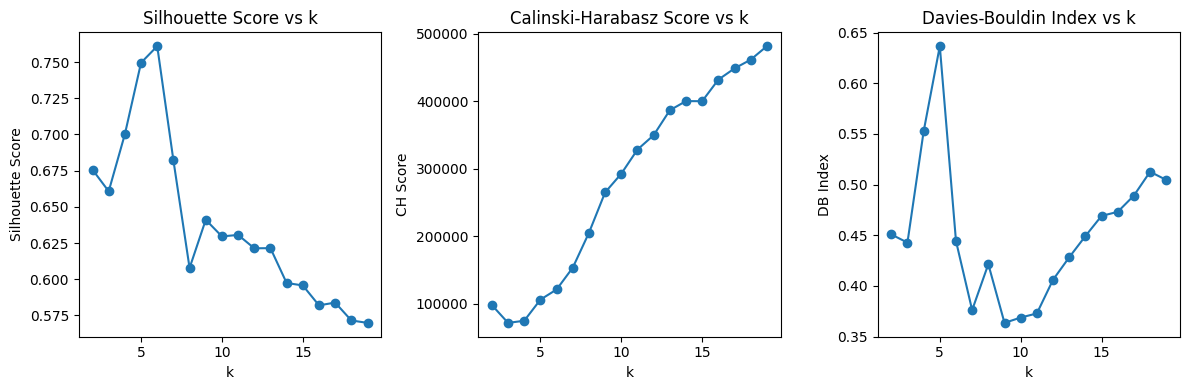

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

silhouette_scores = []
ch_scores = []
db_scores = []
k_values = []
sample_size = 10000  # Limit for silhouette computation

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_train)

    # Take random sample for silhouette score
    if X_train.shape[0] > sample_size:
        idx = np.random.choice(X_train.shape[0], sample_size, replace=False)
        X_sample = X_train.iloc[idx]   # ✅ fix: use .iloc for row selection
        labels_sample = labels[idx]
    else:
        X_sample = X_train
        labels_sample = labels

    silhouette_scores.append(silhouette_score(X_sample, labels_sample))
    ch_scores.append(calinski_harabasz_score(X_train, labels))
    db_scores.append(davies_bouldin_score(X_train, labels))
    k_values.append(k)

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score vs k")
plt.xlabel("k")
plt.ylabel("Silhouette Score")

plt.subplot(1, 3, 2)
plt.plot(k_values, ch_scores, marker='o')
plt.title("Calinski-Harabasz Score vs k")
plt.xlabel("k")
plt.ylabel("CH Score")

plt.subplot(1, 3, 3)
plt.plot(k_values, db_scores, marker='o')
plt.title("Davies-Bouldin Index vs k")
plt.xlabel("k")
plt.ylabel("DB Index")

plt.tight_layout()
plt.show()


Question 7

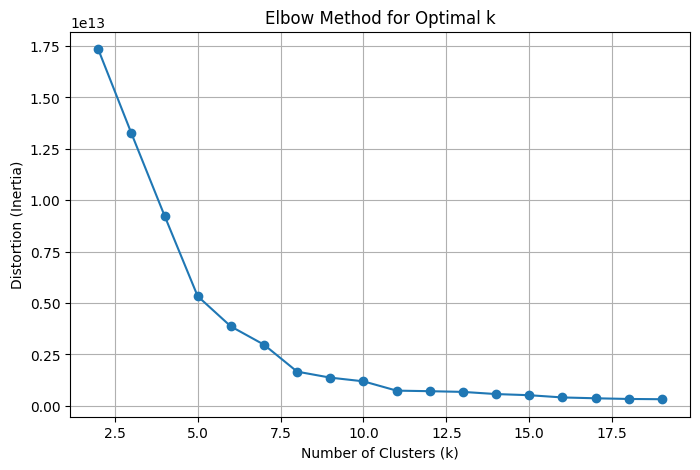

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Store distortion (inertia) values
distortions = []

# Try k values from 2 to 19
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)  # Use your training data
    distortions.append(kmeans.inertia_)  # Inertia = sum of squared distances to nearest cluster center

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 20), distortions, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distortion (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

# Validation for chosen k
chosen_k = 8
sample_size = 5000

# Fit KMeans
labels = KMeans(n_clusters=chosen_k, random_state=42, n_init=10).fit_predict(X_train)

# Sample for silhouette if dataset is large
if len(X_train) > sample_size:
    idx = np.random.choice(len(X_train), sample_size, replace=False)
    sil = silhouette_score(X_train.iloc[idx], labels[idx])
else:
    sil = silhouette_score(X_train, labels)

# Other metrics
ch = calinski_harabasz_score(X_train, labels)
db = davies_bouldin_score(X_train, labels)

print(f"Validation for k={chosen_k}")
print(f"Silhouette Score      : {sil:.4f}")
print(f"Calinski-Harabasz     : {ch:.4f}")
print(f"Davies-Bouldin        : {db:.4f}")


Validation for k=8
Silhouette Score      : 0.6115
Calinski-Harabasz     : 204863.5327
Davies-Bouldin        : 0.4214
